In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC










# SalaryData.csv

# 1 - Business Problem

Prepare a classification model using SVM for salary data

## 2 - Data collection and description

In [2]:
test_tmp = pd.read_csv(r"/content/SalaryData_Test.csv")
train_tmp = pd.read_csv(r"/content/SalaryData_Train.csv")

In [3]:
df_tmp = test_tmp.append(train_tmp)

In [4]:
test = test_tmp.copy()
train = train_tmp.copy()

In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [8]:
number = LabelEncoder()

for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [9]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [10]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [11]:
mapping = {' >50K': 1, ' <=50K': 2}

In [12]:
df = train.append(test) 

In [13]:
df1 = df.copy()

In [14]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


## EDA

In [15]:
df1.shape

(45221, 14)

In [16]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
workclass,45221.0,2.204507,0.958132,0.0,2.0,2.0,2.0,6.0
education,45221.0,10.313217,3.816992,0.0,9.0,11.0,12.0,15.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
maritalstatus,45221.0,2.585148,1.500460,0.0,2.0,2.0,4.0,6.0
occupation,45221.0,5.969572,4.026444,0.0,2.0,6.0,9.0,13.0
relationship,45221.0,1.412684,1.597242,0.0,0.0,1.0,3.0,5.0
race,45221.0,3.680281,0.832361,0.0,4.0,4.0,4.0,4.0
sex,45221.0,0.675062,0.468357,0.0,0.0,1.0,1.0,1.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0


In [17]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

Correlation

In [18]:
cor = df1.corr()
cor

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.085890,-0.003497,0.037623,-0.271616,-0.004474,-0.247561,0.023781,0.082040,0.079682,0.059426,0.101992,-0.002879
workclass,0.085890,1.000000,0.017852,0.040778,-0.033217,0.017508,-0.065048,0.049767,0.069633,0.034542,0.008261,0.051366,0.003889
education,-0.003497,0.017852,1.000000,0.347451,-0.041547,-0.033500,-0.013190,0.011446,-0.027531,0.029893,0.016740,0.060890,0.078800
educationno,0.037623,0.040778,0.347451,1.000000,-0.064986,0.089686,-0.088431,0.031655,0.003416,0.126907,0.081741,0.146206,0.094125
maritalstatus,-0.271616,-0.033217,-0.041547,-0.064986,1.000000,0.016399,0.180430,-0.070311,-0.119982,-0.042397,-0.034940,-0.183178,-0.022880
occupation,-0.004474,0.017508,-0.033500,0.089686,0.016399,1.000000,-0.051644,-0.000026,0.056626,0.019435,0.015271,0.016160,-0.002628
relationship,-0.247561,-0.065048,-0.013190,-0.088431,0.180430,-0.051644,1.000000,-0.118588,-0.582977,-0.056817,-0.058485,-0.259194,-0.007016
race,0.023781,0.049767,0.011446,0.031655,-0.070311,-0.000026,-0.118588,1.000000,0.088949,0.014079,0.020917,0.044739,0.126192
sex,0.082040,0.069633,-0.027531,0.003416,-0.119982,0.056626,-0.582977,0.088949,1.000000,0.047441,0.046639,0.231427,-0.004653
capitalgain,0.079682,0.034542,0.029893,0.126907,-0.042397,0.019435,-0.056817,0.014079,0.047441,1.000000,-0.032095,0.083880,0.007641


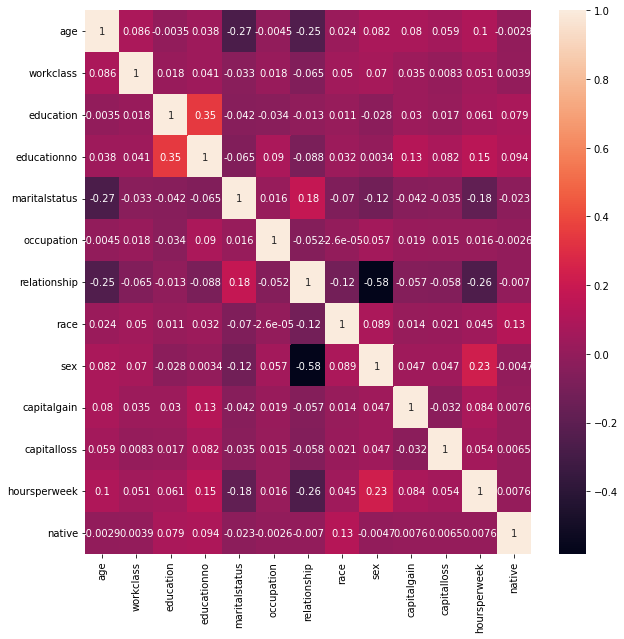

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

In [20]:
plt.rcParams["figure.figsize"] = 9,5

In [21]:

print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))


Skew: -0.31062061074424
Kurtosis: 0.6350448194491634


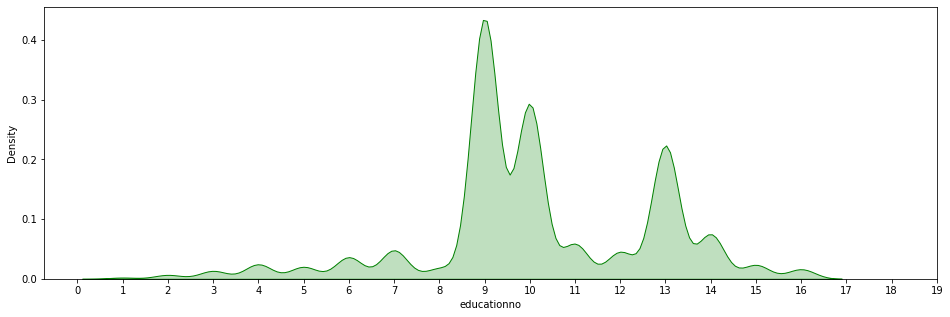

In [22]:
plt.figure(figsize=(16,5))
df1 = df1.reset_index()
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The Data is negatively skewed and has low kurtosis value

Most of people have eduction Number of years of education 8 - 11

In [23]:
dfa = df_tmp[df_tmp.columns[0:13]]
dfa


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [24]:
obj_colum = dfa.select_dtypes(include='object').columns.tolist()
obj_colum

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

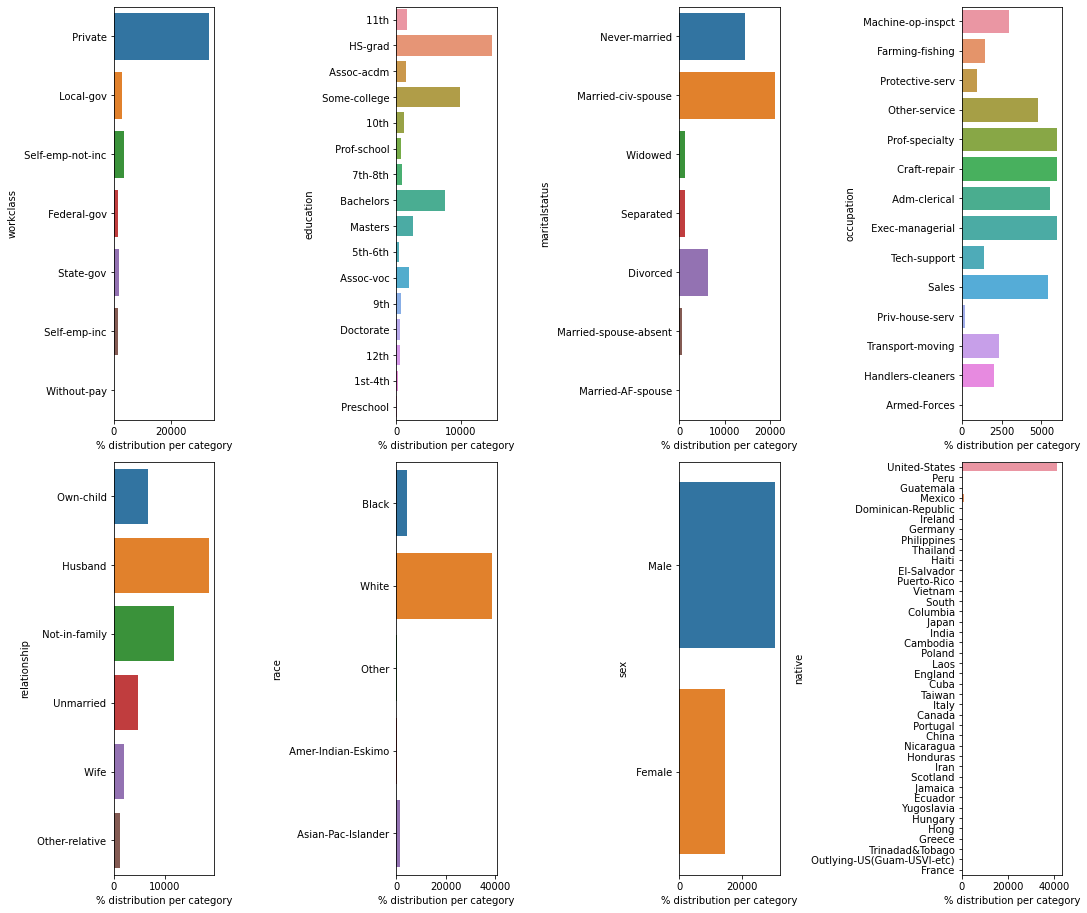

In [25]:
plt.figure(figsize=(15,25))
for i,col in enumerate(obj_colum,1):
  plt.subplot(4,4,i)
  sns.countplot(data=dfa,y=col)
  plt.ylabel(col)
  plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

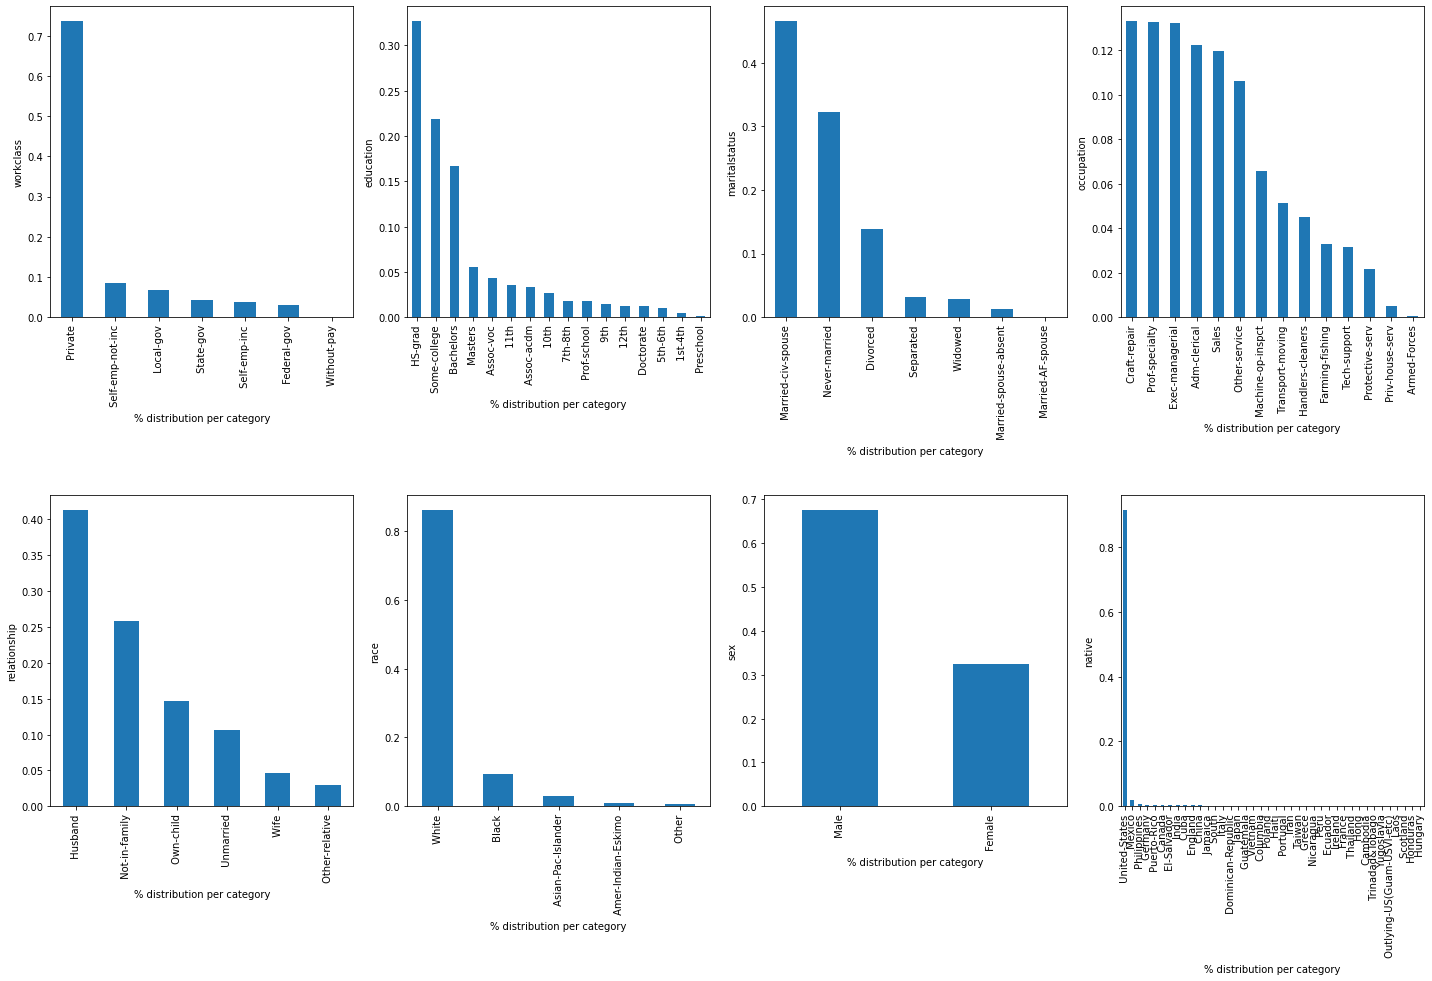

In [26]:
plt.figure(figsize=(20,25))
for i,col in enumerate(obj_colum,1):
  plt.subplot(4,4,i)
  df_tmp[col].value_counts(normalize=True).plot.bar()
  plt.ylabel(col)
  plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

Majority of the workclass is in Private Sector

Also for education majority of the people have HS graduation or some college degree

In [27]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()
num_columns

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [28]:
df = df.reset_index()

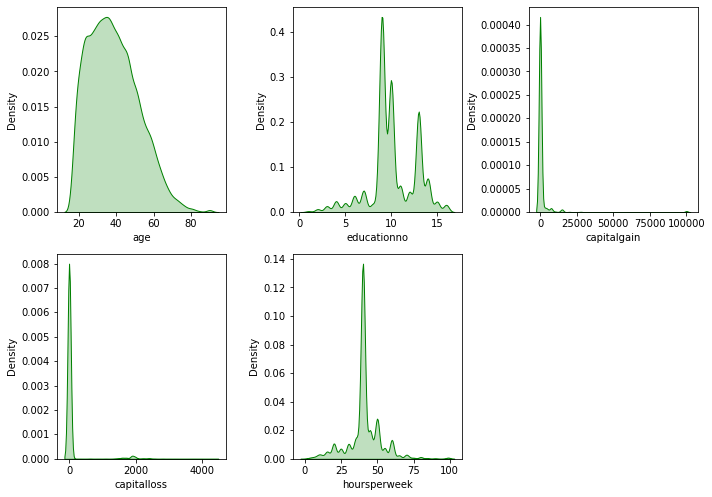

In [29]:

plt.figure(figsize=(10,10))
for i,col in enumerate(num_columns,1):
    plt.subplot(3,3,i)
    sns.kdeplot(df[col],color='g',shade=True)
plt.tight_layout() 
plt.show()
num_data = df[num_columns]


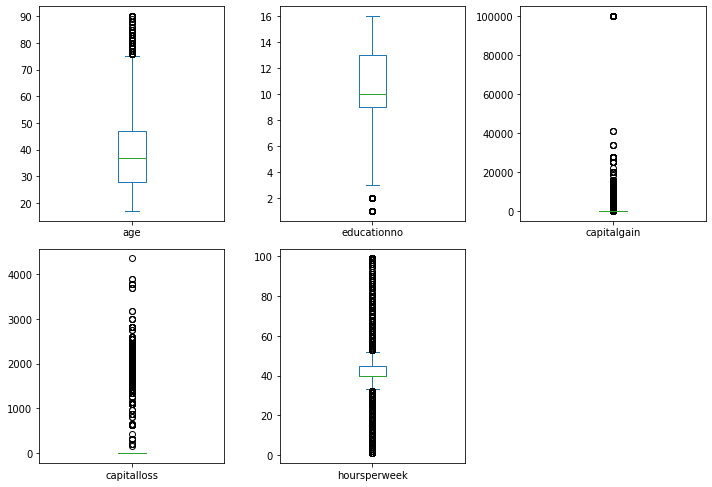

In [30]:
plt.figure(figsize=(10,10))
for i,col in enumerate(num_columns,1):
    plt.subplot(3,3,i)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]

In [31]:
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.532784,-0.310621,11.788871,4.517536,0.340536
kurtosis,-0.155931,0.635045,150.147899,19.376085,3.201287


## 3 - SVM

In [32]:
df1

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
45217,15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
45218,15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
45219,15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [33]:
X = df1.iloc[:,0:14]
Y = df1.iloc[:,14]

In [34]:
X

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,15055,33,2,9,13,4,9,3,4,1,0,0,40,37
45217,15056,39,2,9,13,0,9,1,4,0,0,0,36,37
45218,15057,38,2,9,13,2,9,0,4,1,0,0,50,37
45219,15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [35]:
Y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
45216     <=50K
45217     <=50K
45218     <=50K
45219     <=50K
45220      >50K
Name: Salary, Length: 45221, dtype: object

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [37]:
y_test

41386     <=50K
35278     <=50K
26950     <=50K
29133     <=50K
41793     <=50K
          ...  
39916      >50K
29313     <=50K
34409     <=50K
27489     <=50K
19057     <=50K
Name: Salary, Length: 4523, dtype: object

In [38]:
y_train

1402      <=50K
14614     <=50K
13931     <=50K
2958      <=50K
20252     <=50K
          ...  
30403     <=50K
21243      >50K
42613      >50K
43567      >50K
2732      <=50K
Name: Salary, Length: 40698, dtype: object

In [39]:
x_test

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
41386,11225,23,2,7,12,2,4,5,4,0,0,0,45,10
35278,5117,40,2,15,10,5,12,3,4,0,0,0,32,37
26950,26950,45,2,9,13,0,3,1,4,1,0,0,45,37
29133,29133,23,2,15,10,4,5,3,4,1,0,0,20,37
41793,11632,31,2,11,9,2,0,0,4,1,0,0,40,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39916,9755,31,2,11,9,2,13,0,4,1,0,0,45,37
29313,29313,43,2,11,9,2,11,0,4,1,0,0,40,37
34409,4248,51,2,15,10,0,11,4,2,0,0,0,50,37
27489,27489,37,2,15,10,2,12,5,4,0,5013,0,40,37


In [40]:
x_train

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
1402,1402,26,1,9,13,4,9,1,4,1,0,2339,55,37
14614,14614,53,5,11,9,0,3,1,4,1,0,1092,40,37
13931,13931,30,2,11,9,4,0,4,4,1,0,0,40,37
2958,2958,53,1,11,9,2,7,0,4,1,0,2002,45,37
20252,20252,63,2,1,7,2,11,0,4,1,0,0,22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,242,26,2,9,13,4,0,3,4,0,0,0,40,37
21243,21243,51,2,7,12,2,3,0,4,1,0,0,45,37
42613,12452,64,4,11,9,2,9,0,4,1,0,0,60,37
43567,13406,48,2,15,10,2,7,0,2,1,0,0,40,37


## 3.1 - Linear

In [ ]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Took lot of time to run the code

# 3.2 - Poly

In [44]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.7968162723855848


# 3.3 - RBF

In [43]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.8010170240990493


# 3.4 - Sigmoid

In [42]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.6462524872871988


# 4 - Conclusion

RBF Model gives the best accuracy 80%

# ForestFire.csv

# 1 - Business Problem

classify the Size_Categorie using SVM

# 2 - Data collection and description

In [41]:
data = pd.read_csv(r'/content/forestfires.csv')

In [42]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [43]:
data1 = data.copy()

# EDA

In [44]:
data1.drop(["month","day"],axis=1,inplace = True)

In [45]:
data1.shape

(517, 29)

In [46]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [47]:
data1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

# Correlation

In [48]:
cor = data1[data1.columns[0:11]].corr()
cor

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,-0.059396
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,-0.107921
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,-0.052993
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,-0.158601
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,-0.136529
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,0.009376
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,-0.063881
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,-0.029945
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,-0.021206
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,-0.181293


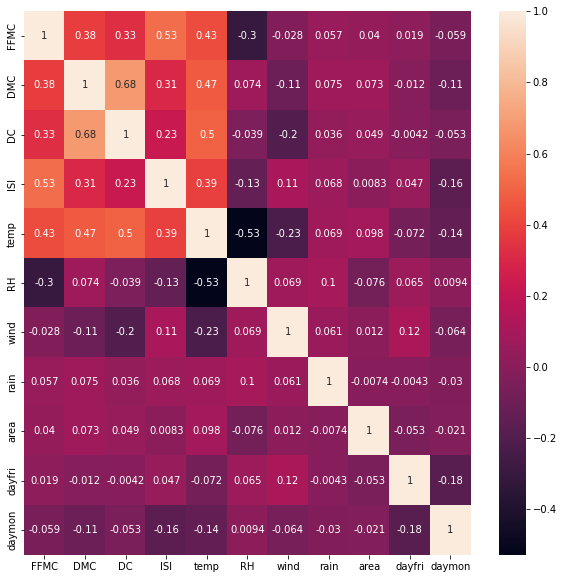

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

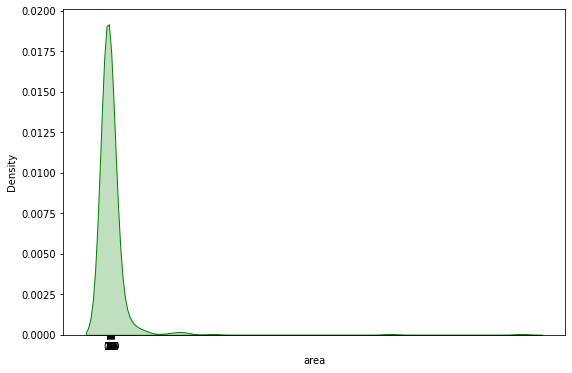

In [50]:
plt.figure(figsize=(9,6))
ax = sns.kdeplot(data1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The Data is highly skewed and has large kurtosis value

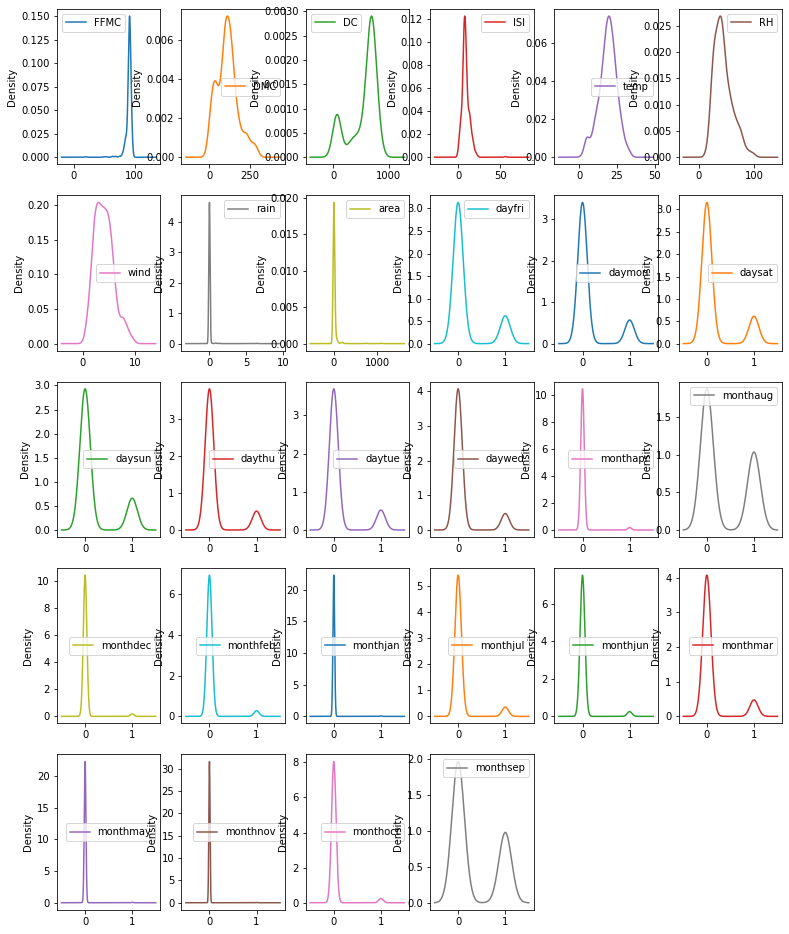

In [51]:
data1.plot(kind='density', subplots=True, layout=(6,6), figsize=(13,20), sharex=False, sharey=False)
plt.show()

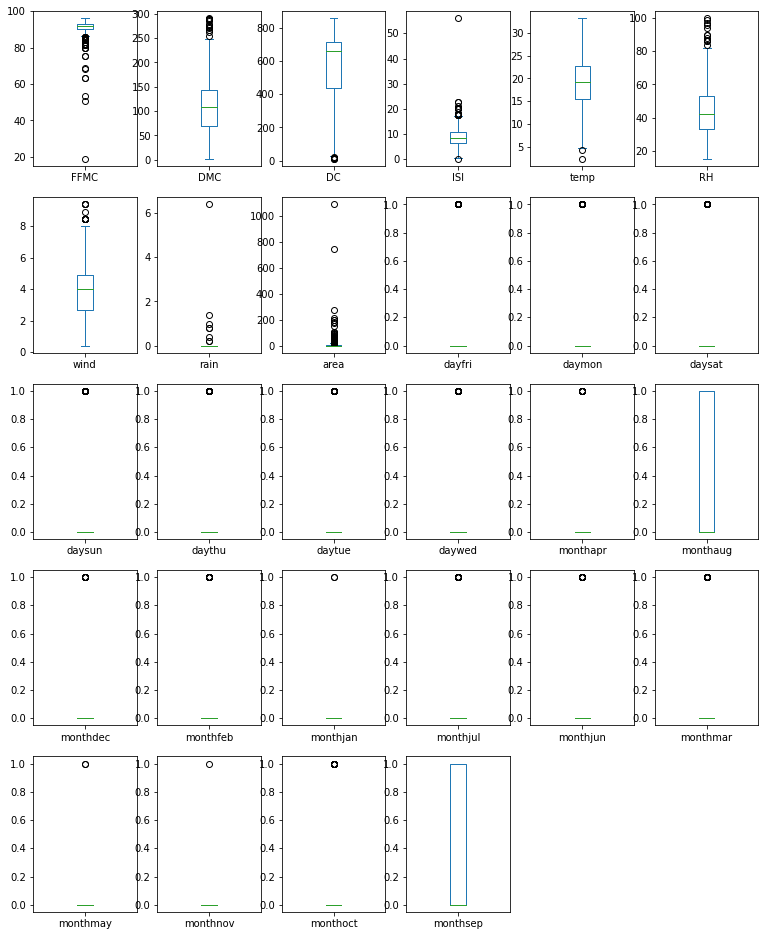

In [52]:
data1.plot(kind='box', subplots=True, layout=(6,6), figsize=(13,20), sharex=False, sharey=False)
plt.show()

In [53]:
num_columns = data1.select_dtypes(exclude='object').columns.tolist()
num_data = data1[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105,...,7.401340,4.798308,16.031038,3.646828,5.254127,2.594172,16.031038,22.737634,5.628522,0.712255
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265,...,52.984784,21.105386,255.984443,11.343218,25.705276,4.748083,255.984443,517.000000,29.795509,-1.498505


# SVM

In [54]:
X = data1.iloc[:,0:28]
y = data1.iloc[:,28]

In [55]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [56]:
X_norm = norm_func(X)

In [57]:
x_train,x_test,y_train,y_test= train_test_split(X_norm,y, test_size=0.2,stratify = y)

# Linear

In [61]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.7692307692307693


# Poly

In [58]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.7692307692307693


# RBF

In [59]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.75


# Sigmoid

In [60]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.7307692307692307


# 4 - Conclusion

Poly and Linear Models give the best accuracy 77%